# Stat 4770/7770 Final Presentation

* Ritvik Ellendula
* A Data Analysis Exploration into Environmental & Socioeconomic Factors on Poor Health Outcomes

## Introduction

* This project strives to analyze the magnitude and influence that different socioeconomic factors possess on overall poor health
* To do this, this project utilized the Python libraries Pandas, Seaborn, Numpy, MatPlotLib, and Sklearn to graph and create models to discern different variables' impact on health

## Importing Libraries

In [158]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(4.5,3.18)}) # A default plot size for axes level plots.
county_data = pd.read_csv("/Users/ritvikellendula/Downloads/project_4770_7770.csv",
                          index_col='Row.Label')

## Summaries

In [159]:
county_data.describe()
print("General Summary Statistics on Data")
print(county_data.describe())

General Summary Statistics on Data
       Five-digit.FIPS.Code  State.FIPS.Code  County.FIPS.Code  Poor.Health  \
count           2715.000000      2715.000000       2715.000000  2715.000000   
mean           30479.473665        30.376059        103.414733     0.174385   
std            15292.329045        15.272748        108.697370     0.045176   
min             1001.000000         1.000000          1.000000     0.082900   
25%            19016.000000        19.000000         35.000000     0.140350   
50%            29163.000000        29.000000         79.000000     0.167300   
75%            46025.000000        46.000000        133.000000     0.203950   
max            56045.000000        56.000000        840.000000     0.407300   

         Uninsured  Primary.Care.Physicians.Per.1000  \
count  2715.000000                       2715.000000   
mean      0.107790                          0.557937   
std       0.047841                          0.329909   
min       0.020700           

## Mean/Median Poor Health Proportions Across State


In [160]:
state_mean=county_data.groupby("State.Abbreviation")["Poor.Health"].mean()
state_median=county_data.groupby("State.Abbreviation")["Poor.Health"].median()
print("Highest Mean and Median:")
print(state_mean.sort_values(ascending=True).head(5))
print(state_median.sort_values(ascending=True).head(5))
print("Lowest Mean and Median:")
print(state_mean.sort_values(ascending=True).tail(5))
print(state_median.sort_values(ascending=True).tail(5))

Highest Mean and Median:
State.Abbreviation
CT    0.113317
VT    0.116242
SD    0.119667
RI    0.121780
MN    0.123187
Name: Poor.Health, dtype: float64
State.Abbreviation
SD    0.11215
RI    0.11260
VT    0.11495
CT    0.11600
MN    0.12165
Name: Poor.Health, dtype: float64
Lowest Mean and Median:
State.Abbreviation
KY    0.221119
MS    0.223572
WV    0.225047
AL    0.229694
AR    0.231626
Name: Poor.Health, dtype: float64
State.Abbreviation
KY    0.22040
WV    0.22070
AL    0.22090
MS    0.22195
AR    0.22510
Name: Poor.Health, dtype: float64


## Graphical Data on Poor Health Averages Across States

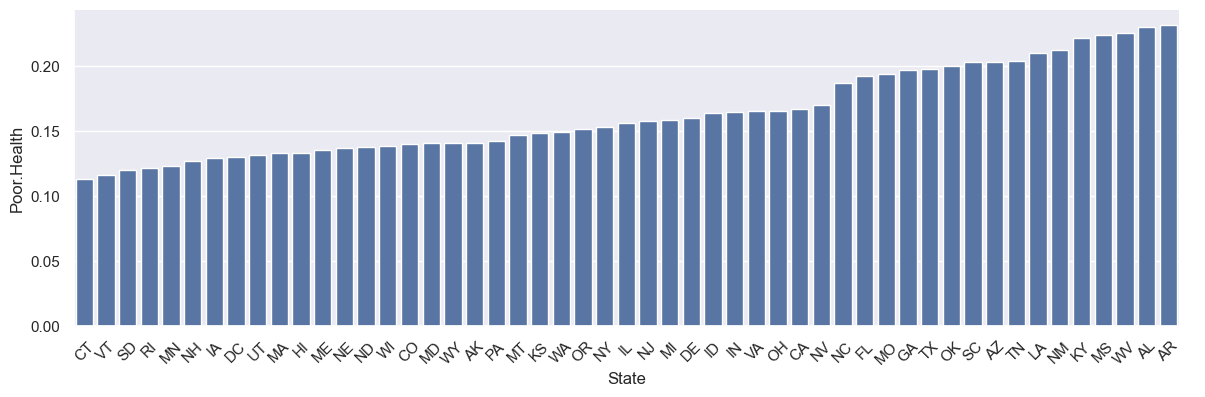

In [161]:
statesgroupsascend = county_data.groupby('State.Abbreviation')['Poor.Health'].mean().sort_values(ascending = True)
df_tmp = pd.DataFrame(statesgroupsascend)
df_tmp['State'] = df_tmp.index
sns.catplot(data=df_tmp, y="Poor.Health", x = 'State', kind="bar", height=4, aspect=3)
plt.xticks(rotation=45);
plt.show()

## Important Considerations


* The associations and relationships found within this analysis are not necessarily causal
* Upon Reviewing the Data Dictionary, there is a very evident distribution amongst variables focusing on 1)Outcome, 2)Access/Quality of Care, 3)Social Determinants of Health-Behavioral, 4)Social Determinants of Health-Environmental, 5)Demographic Characteristics

# Key Questions of Interest

1. Is a higher number of physicians in the area associated with less poor health outcomes?
2. Is a higher rate of unemployment related to poor health outcomes? 
3. Is a higher percent rural related to poor health outcomes?
4. Is excessive drinking related to poor health outcomes? 


## Y-Variable Rationale
* According to the Data Dictionary Review, there are two "outcome variables" : Poor Health & Election Results
> Specifically, this analysis specifically chooses Poor Health Outcomes, as numerous environmental factors & socioeconomic factors hold a strong impact on poor health, and there are many different "predictor variables" to consider
> Poor Health, in this context refers to the "portion of county that has a poor health status"


## Possible Predictor Variable Correlations


In [162]:
y = 'Poor.Health'
selected_vars = ['Primary.Care.Physicians.Per.1000', 'Unemployment', 
          'Percent.Rural', 'Excessive.Drinking']
broad_vars = ['Primary.Care.Physicians.Per.1000', 'Mental.health.providers.Per.1000', 'Adult.Obesity', 'Proportion.of.Smokers','High.School.Graduation',
              'Physical.Inactivity', 'Excessive.Drinking', 'Median.Household.Income', 'Severe.Housing.Problems', 'Unemployment', 'Percent.Rural', 'Over.65', 'Percent.Females', 'Life.Expectancy']
print("Correlation of Poor Health with majority of predictors:\n")
print(county_data[[y] + broad_vars].corr()[y].sort_values(ascending=False))

Correlation of Poor Health with majority of predictors:

Poor.Health                         1.000000
Proportion.of.Smokers               0.723864
Physical.Inactivity                 0.603145
Unemployment                        0.544357
Adult.Obesity                       0.456427
Severe.Housing.Problems             0.280768
Percent.Rural                       0.124330
Percent.Females                    -0.008175
Mental.health.providers.Per.1000   -0.098010
Over.65                            -0.104271
High.School.Graduation             -0.110337
Primary.Care.Physicians.Per.1000   -0.306522
Life.Expectancy                    -0.644491
Excessive.Drinking                 -0.660582
Median.Household.Income            -0.680146
Name: Poor.Health, dtype: float64


## Selected Predictor Variable Correlations


In [163]:
print("\nCorrelation of Poor.Health with selected predictors:\n")
print(county_data[[y] + selected_vars].corr()[y].sort_values(ascending=False))


Correlation of Poor.Health with selected predictors:

Poor.Health                         1.000000
Unemployment                        0.544357
Percent.Rural                       0.124330
Primary.Care.Physicians.Per.1000   -0.306522
Excessive.Drinking                 -0.660582
Name: Poor.Health, dtype: float64


## Review y-variable's association with potential predictors 
> Potential predictive variables to assess "poor health" include the number of physicians, the rate of unemployment, the percentage of rural, and the high school graduation rate
* As evidenced by the Data Dictionary Review, there are four core areas that predictor variables span to assess the outcome variables, so this analysis looks at a specific subset of columns that represent different aspects of determinants for health.
* For instance, Primary Care Physicians Per 1000 = access to healthcare, Unemployment = health-environmental, Percent Rural = demographics, and High School Graduation = health-behavioral
> Looking at correlations : Unemployment has positive correlation with poor health, Percent rural has a minor positive correlation with poor health, Primary Care Physicians has a small negative correlation, meaning more medical providers causes better health outcomes, and excessive drinking has strong negative correlation. 

## Association Graphics
* 4 Different linear models (each one of the predictor variables' relationship with Poor Health)

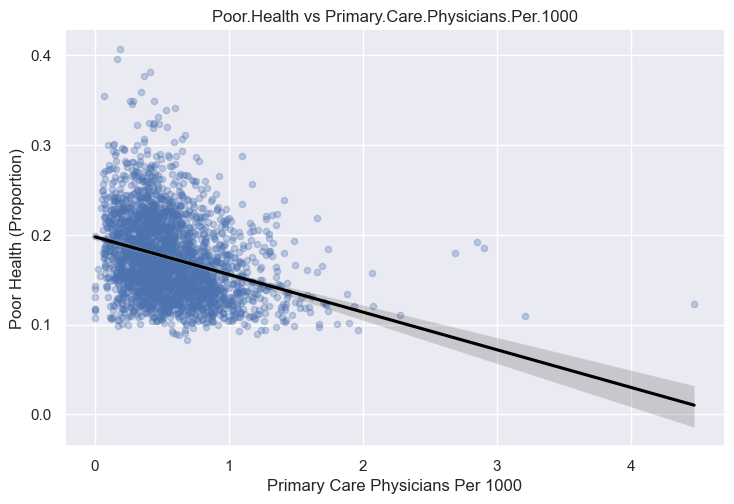

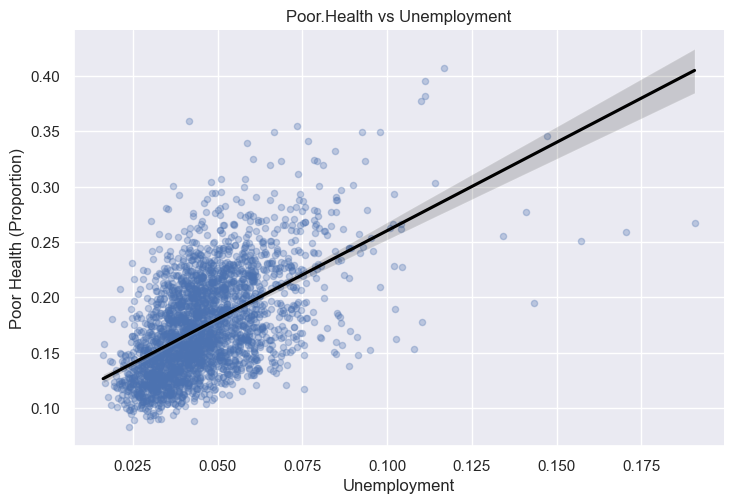

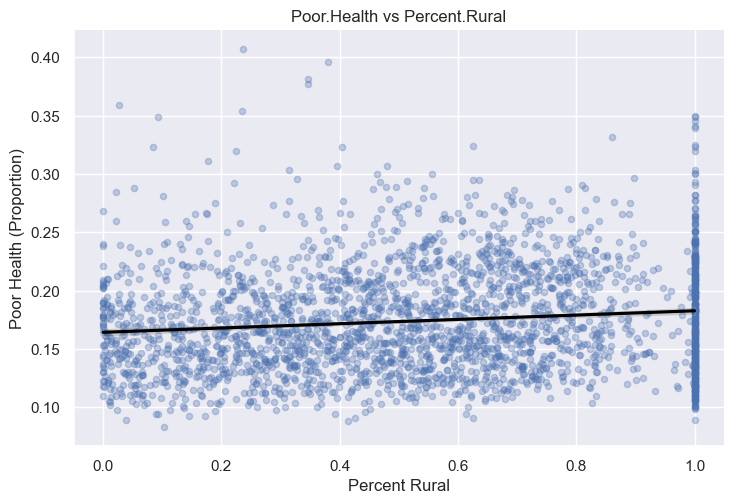

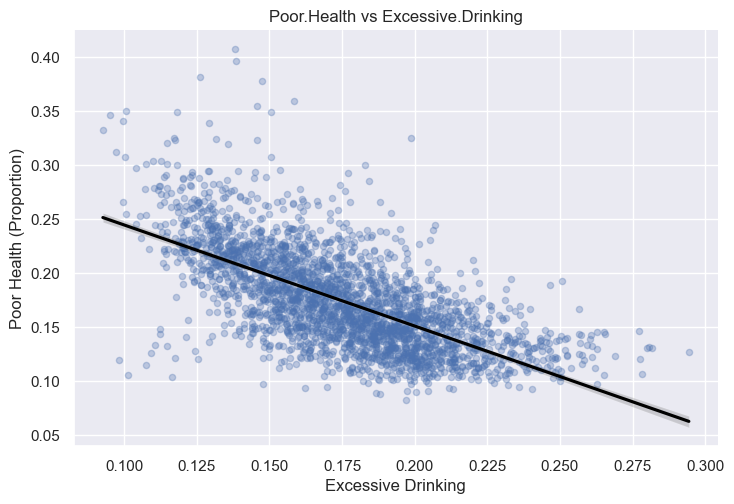

In [164]:
for x in selected_vars:
    sns.lmplot(x=x, y=y, data=county_data, height=5, aspect=1.5,
               scatter_kws={'alpha':0.3,'s':20}, line_kws={'color':'black'})
    plt.title(f'{y} vs {x}')
    plt.xlabel(x.replace('.', ' '))
    plt.ylabel('Poor Health (Proportion)')
    plt.show()

## Relationship between predictor variables
* There is a relationship between poor and the predictor variables, so it's pertinent to visualize potential interactions with predictor variables
* Such case is relationship between excessive drinking and unemployment

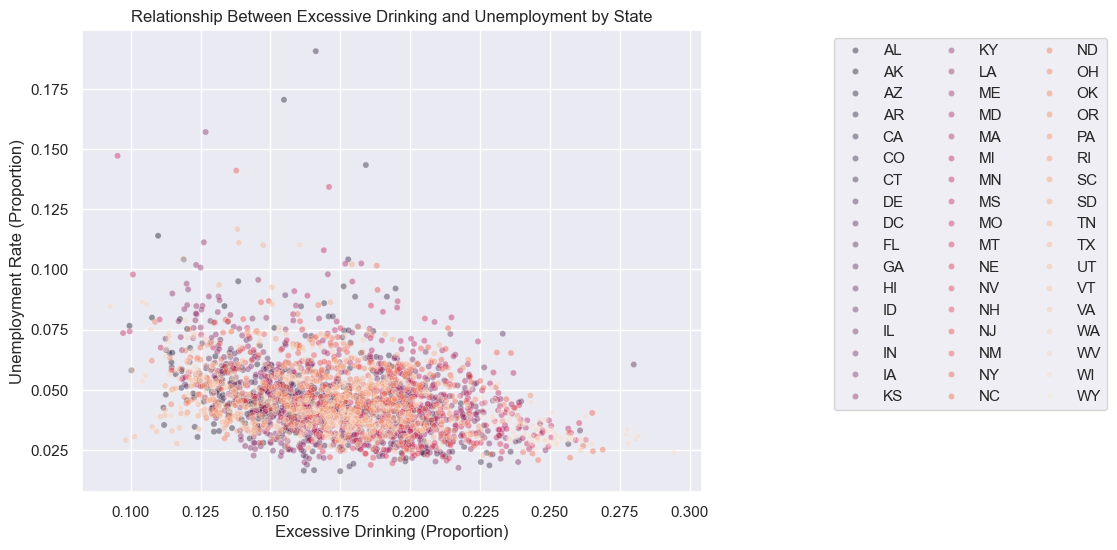

In [165]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=county_data, x='Excessive.Drinking', y='Unemployment', hue='State.Abbreviation',
    alpha=0.4, s=20, palette='rocket'
)
plt.title('Relationship Between Excessive Drinking and Unemployment by State')
plt.xlabel('Excessive Drinking (Proportion)')
plt.ylabel('Unemployment Rate (Proportion)')
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper left', ncol=3)
plt.show()

## Analyzing Relationship between Predictor Variables Including Region Mapping
* It gets convoluted with so many states, so we can split it to regions, assigning states to a region like the Midwest or Northeast, and we see the relationship to that specific region

In [166]:
#next, we can add a column to the dataset with regions 
region_map = {
    'ME':'Northeast','NH':'Northeast','VT':'Northeast','MA':'Northeast','RI':'Northeast','CT':'Northeast','NY':'Northeast','NJ':'Northeast','PA':'Northeast',
    'OH':'Midwest','MI':'Midwest','IN':'Midwest','IL':'Midwest','WI':'Midwest','MN':'Midwest','IA':'Midwest','MO':'Midwest','ND':'Midwest','SD':'Midwest','NE':'Midwest','KS':'Midwest',
    'DE':'South','MD':'South','DC':'South','VA':'South','WV':'South','KY':'South','NC':'South','SC':'South','GA':'South','FL':'South','AL':'South','TN':'South','MS':'South','AR':'South','LA':'South','OK':'South','TX':'South',
    'MT':'West','ID':'West','WY':'West','CO':'West','NM':'West','AZ':'West','UT':'West','NV':'West','CA':'West','OR':'West','WA':'West','AK':'West','HI':'West'
}

county_data['Region'] = county_data['State.Abbreviation'].map(region_map)
#After all this grueling identification, we now have a cohesive column added to the original data that assigns the region map to the same column as the state it's associated with

## Region Mapping Graph

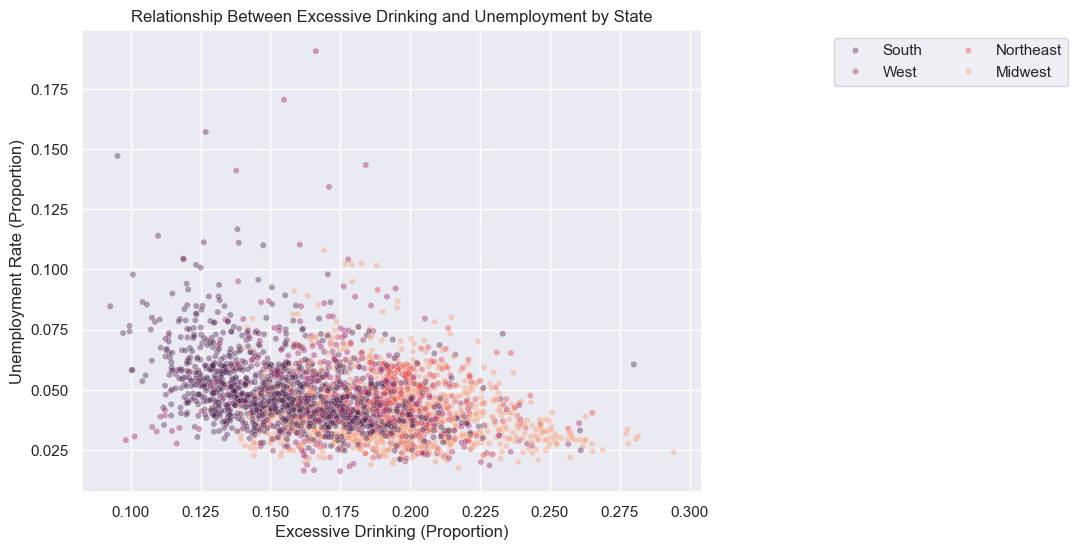

In [167]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=county_data,x='Excessive.Drinking',y='Unemployment',
                hue='Region',alpha=0.4,s=20,palette='rocket'
)
plt.title('Relationship Between Excessive Drinking and Unemployment by State')
plt.xlabel('Excessive Drinking (Proportion)')
plt.ylabel('Unemployment Rate (Proportion)')
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper left', ncol=2)
plt.show()


## Heat Mapping Graph
* This graph is a heatmap, and it depicts each predictor variable's general correlation with one another, using harsher colors to show stronger correlation

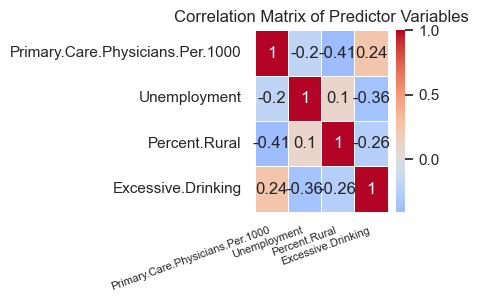

In [168]:
corr = county_data[selected_vars].corr()
sns.heatmap(corr,annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Matrix of Predictor Variables')
plt.xticks(rotation=20, ha='right', fontsize=8)
plt.tight_layout() 
plt.show()

## Review of distribution
>The graphs for poor health versus primary physician count and excessive drinking depict a negative trend between those predictors and the outcome variables
* This shows that higher access to physicians provides better health outcomes, and higher drinking means better health, which may seem counterintuitive, but oftentimes a strong drinking culture can be related to high wealth, which relates to better access to healthcare, healthy food, etc.
>The graph also shows a somewhat positive trend between percent rural and poor health, but a very strong positive trend between unemployment and poor health.
* This may mean that rural areas have somewhat limited access to healthcare access, causing worse health outcomes. Furthermore, higher unemployment rates may signify less access to necessities, limiting access to resources to improve health.
>Additionally, the scatterplot and the heatmap show the relationship between some variables is relatively impactful, which is important to consider in the future. 



# Creating a Predictive Model for Poor Health
* Now, we will begin creating predictive models, a decision tree matrix
* This will help quantify the relationship between our selected predictor variables and poor health

## Decision Tree Explanation
* Decision trees work by breaking down complex decisions to numerous simpler, smaller choices
* The process begins with an initial decision node, which splits numerous times to decision nodes, which take a different path based on their own requirements
* This process is repeated to create sub-nodes until the complex decision is broken to the nth degree
* Cost complexity Tree Pruning -- a strong implementation not utilized in this analysis -- reduces a larger decision tree to a more efficient one by iterating to remove the "weak" links by assessing the tree that provides the least impact to accuracy based on its relative complexity


## Decision Tree Model


In [169]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

#redefining variables quickly
y = county_data['Poor.Health']
X = county_data[['Unemployment', 'Excessive.Drinking',
                 'Percent.Rural', 'Primary.Care.Physicians.Per.1000']]
#train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1940)

#create initial tree
regtree = DecisionTreeRegressor(random_state=1940, max_leaf_nodes=8)
print("The specific decision tree specifications used are: ")
print(regtree.fit(X_train, y_train))


The specific decision tree specifications used are: 
DecisionTreeRegressor(max_leaf_nodes=8, random_state=1940)


## Tree Visualization
* Tree shows the path predictive model takes (specific values considered)
* Max Leaves Node=8, so tree stops at 8 Decisions

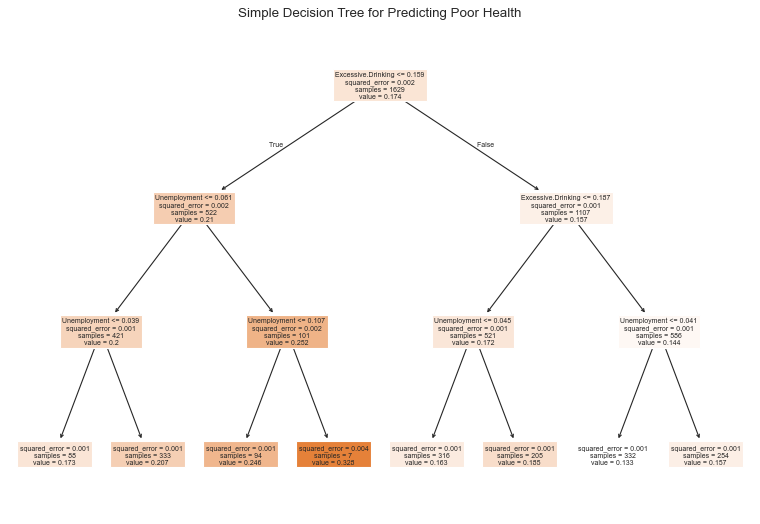

In [170]:
#model tree
fig = plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plot_tree(regtree, filled=True, feature_names=list(X.columns))
plt.title("Simple Decision Tree for Predicting Poor Health")
plt.show()

## Checking Accuracy

In [171]:
#get accuracy checkers 
y_pred = regtree.predict(X_test)
r2 = regtree.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Next, in order to assess how strong our tree is we will calculate two values: Variance(R^2) and Root Mean Squared Error (RMSE)\n")
print(f"R^2 (Variance): {r2:.3f}") #.3f is how many decimal places it'll go 
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}") #.3f is how many decimal places it'll go 

Next, in order to assess how strong our tree is we will calculate two values: Variance(R^2) and Root Mean Squared Error (RMSE)

R^2 (Variance): 0.554
Root Mean Squared Error (RMSE): 0.031


## Model Accuracy Explanation
* In this scenario, a variance of 0.554 means that the model explains 55.4% of variation in the poor health outcomes, meaning based on the data, the tree does a moderate job on capturing variation in data. 
* The Root Mean Squared Error assesses the percent difference between the predictions and observed values that the model captures, so a 0.031 value is indicative of a 3.1% difference on average predictions


## Respective Variables' Importance
* Next, we'll rank each variable and their respective importance and contributions to our model. 


In [172]:
importances = pd.Series(regtree.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Variable Importance (in proportions, from scale of 0 to 1) used by Decision Trees:")
print(importances)
print("\nThese values are indicative that Excessive Drinking and Unemployment Rate \nserved as the major contributors to the decision tree's modeling process")

Variable Importance (in proportions, from scale of 0 to 1) used by Decision Trees:
Excessive.Drinking                  0.716903
Unemployment                        0.283097
Percent.Rural                       0.000000
Primary.Care.Physicians.Per.1000    0.000000
dtype: float64

These values are indicative that Excessive Drinking and Unemployment Rate 
served as the major contributors to the decision tree's modeling process


## Interpretations in Context to Original Questions
* The decision tree model indicates that the variables that have the most magnitude in discerning "poor health" are excessive drinking and unemployment. This means that in regards to the original question, there likely is not a significant impact that rural percent area, and the amount of primary care physicians has on poor health outcomes. 


# Conclusions Pt. 1

1. Q1: Is a higher number of physicians in the area associated with less poor health outcomes?
* It seems that a higher number of physicians is associated with more positive health outcomes, but the extent to which may be low, as the decision tree model failed to capture any impact from number of physicians. 
2.  Q2: Is a higher rate of unemployment related to poor health outcomes?
* It is evident that a higher rate of unemployment is associated with poor health outcomes, and extent is relatively impactful based on our model.

# Conclusions Pt. 2

3. Q3: Is a higher percent rural related to poor health outcomes?
* A higher percent rural likely has little to no impact on poor health outcomes, evidenced by a low relationship and impact in the decision tree model's decision making. 
4. Q4: Is excessive drinking related to poor health outcomes?
* Excessive drinking seems to have a strong negative relationship with poor health outcomes, accompanied by a powerful magnitude, indicative that communities who engage in excessive drinking have less poor health outcomes. 

## Suggestions for further research

* The main surprise in this analysis is the negative relationship between excessive drinking and poor health outcomes
* Future analysis may look into the relationship between excessive drinking and median household income to see if there are socioeconomic-related interaction effects between these variables 